In [72]:
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA 
from sklearn.svm import SVC

### Load dataset with people faces. 

In [73]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [74]:
x = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

### Visualize images

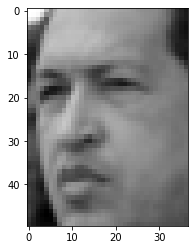

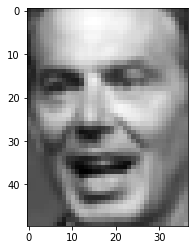

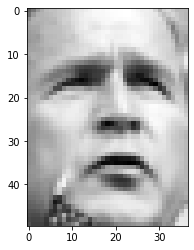

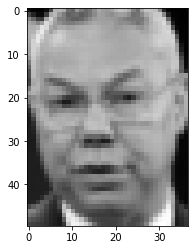

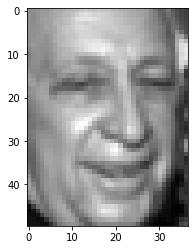

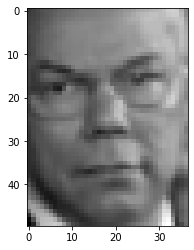

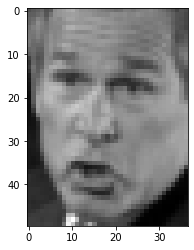

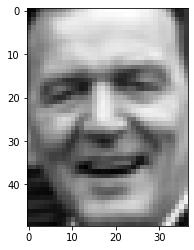

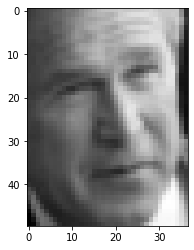

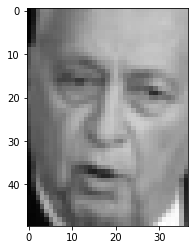

In [75]:
for i in range(10):
    plt.imshow(lfw_people.images[i], cmap= 'gray')
    plt.show()

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)
print(x_train_pca[0].shape)

(50,)


### 1 Train SVM with GridSearchCV
### 2 Print best estimator


In [77]:
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel="rbf", class_weight="balanced")
param_grid = {
    "C": [1e3, 5e3, 1e4, 5e4, 1e5],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
grid_search_clf = GridSearchCV(svm, param_grid)

grid_search_clf.fit(x_train, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.0001}
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.0005}
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.001}
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.005}
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.01}
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.1}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.0001}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.0005}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.001}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.005}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.01}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.1}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.0001}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.0005}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.001}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.005}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.01}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.1}
0.398 (+/-0.004) for {'C': 50000.0, 'gamma': 0.0001}
0.398 (+/-0.004) for {'C':

In [78]:
svm = SVC(C=grid_search_clf.best_params_["C"], gamma=grid_search_clf.best_params_["gamma"], kernel="rbf", class_weight="balanced")

svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

###  Print
1 accuracy,

2 confusion matrix

3 classification_report for y_pred (from sklearn.metrics import classification_report)


In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("accuracy:", accuracy_score(y_test, y_pred))
print("confusion matrix:", confusion_matrix(y_test, y_pred))
print("classification report:", classification_report(y_test, y_pred))

print(x_test[0].shape)

accuracy: 0.453416149068323
confusion matrix: [[  0   0   0  13   0   0   0]
 [  0   0   0  60   0   0   0]
 [  0   0   0  27   0   0   0]
 [  0   0   0 146   0   0   0]
 [  0   0   0  25   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   0   0  36   0   0   0]]
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        27
           3       0.45      1.00      0.62       146
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        36

    accuracy                           0.45       322
   macro avg       0.06      0.14      0.09       322
weighted avg       0.21      0.45      0.28       322

(1850,)


/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [80]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        plt.show()

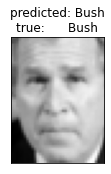

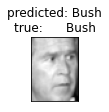

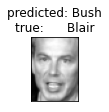

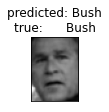

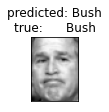

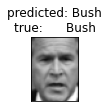

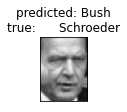

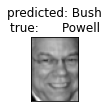

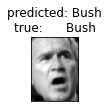

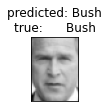

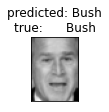

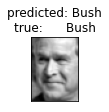

In [81]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(x_test, prediction_titles, h, w)

## Curse of dimensionality?
How could we reduce number of dimensions?

1 use PCA, reduce to 50 dimensional data

2 Transform X_train and X_test to X_trainpca and X_testpca and train SVC again, repeat all steps after training again

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)
print(x_train_pca[0].shape)

svm = SVC(kernel="rbf", class_weight="balanced")
param_grid = {
    "C": [1e3, 5e3, 1e4, 5e4, 1e5],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
grid_search_clf = GridSearchCV(svm, param_grid)

grid_search_clf.fit(x_train_pca, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

svm = SVC(C=grid_search_clf.best_params_["C"], gamma=grid_search_clf.best_params_["gamma"], kernel="rbf", class_weight="balanced")

svm.fit(x_train_pca, y_train)
y_pred = svm.predict(x_test_pca)

print("accuracy:", accuracy_score(y_test, y_pred))
print("confusion matrix:", confusion_matrix(y_test, y_pred))
print("classification report:", classification_report(y_test, y_pred))

(50,)
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.0001}
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.0005}
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.001}
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.005}
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.01}
0.398 (+/-0.004) for {'C': 1000.0, 'gamma': 0.1}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.0001}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.0005}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.001}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.005}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.01}
0.398 (+/-0.004) for {'C': 5000.0, 'gamma': 0.1}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.0001}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.0005}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.001}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.005}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.01}
0.398 (+/-0.004) for {'C': 10000.0, 'gamma': 0.1}
0.398 (+/-0.004) for {'C': 50000.0, 'gamma': 0.0001}
0.398 (+/-0.004) for

/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control